MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning:

In [1]:
import os
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
           

In [2]:
from tensorflow import keras
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the training data
X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten the test data

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


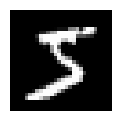

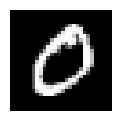

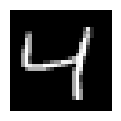

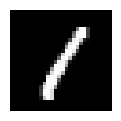

In [5]:
import matplotlib.pyplot as plt
for i,data in enumerate(X_train[:4]):
    plt.subplot(4,1,i+1)
    data = data.reshape(28,28)
    plt.imshow(data,cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
import numpy as np
shuffle_index = np.random.permutation(len(X_train))
X_train = X_train[shuffle_index]
Y_train = Y_train[shuffle_index]

In [7]:
Y_train_5 = (Y_train == 5)
Y_test_5 = (Y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state=42)
classifier.fit(X_train,Y_train_5)
classifier.predict(X_test)

array([False, False, False, ..., False,  True, False])

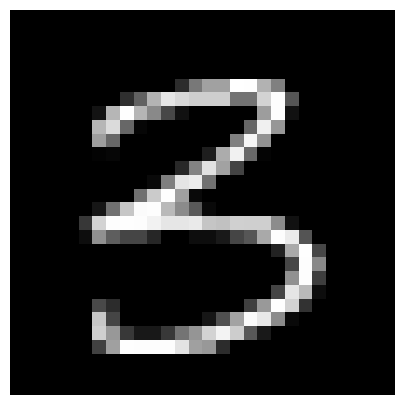

[False]


In [9]:
some_digit = X_train[48000]
digit = some_digit.reshape(28,28)
plt.figure(figsize=(5,5))
plt.imshow(digit,cmap='gray')
plt.axis('off')
plt.show()

print(classifier.predict([some_digit]))

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X_train,Y_train_5,cv=3,scoring='accuracy')

array([0.95745, 0.9639 , 0.95785])

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(classifier,X_train,Y_train_5,cv=3)
print(y_train_predict)

[False False False ... False False  True]


**Confusion Matrix** : Thus in binary classification, the count of 
true negatives is C_00,
false negatives is C_10,
true positives is C_11
and false positives is C_10

In [12]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(Y_train_5,y_train_predict)
print(cm_train)

[[53094  1485]
 [  931  4490]]


In [13]:
y_test_predict = cross_val_predict(classifier,X_test,Y_test_5,cv=3)
cm_test = confusion_matrix(Y_test_5,y_test_predict)
print(cm_test)

[[8936  172]
 [ 247  645]]


In [14]:
from sklearn.metrics import precision_score,recall_score
precision = precision_score(Y_train_5,y_train_predict)
recall = recall_score(Y_train_5,y_train_predict)

print(f'Percision . {precision}, Recall . {recall}')

Percision . 0.7514644351464436, Recall . 0.8282604685482383


In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_train_5,y_train_predict)
print(f'F1 score . {f1}')

F1 score . 0.787995787995788


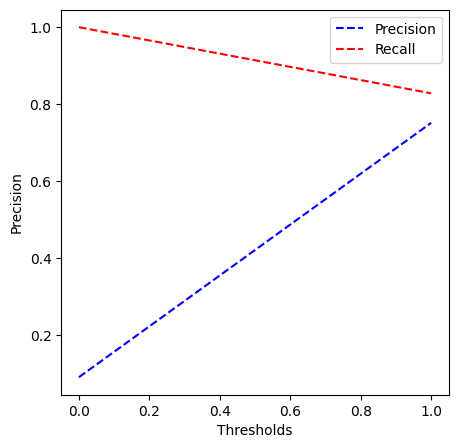

In [16]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(Y_train_5,y_train_predict)
plt.figure(figsize=(5,5))
plt.plot(thresholds,precision[:-1],"b--",label='Precision')
plt.plot(thresholds,recall[:-1],"r--",label='Recall')
plt.legend(loc="best")
plt.xlabel('Thresholds')
plt.ylabel('Precision')
plt.show()

In [17]:
classifier.fit(X_train,Y_train)


SGDClassifier(random_state=42)

In [18]:
y_predict = classifier.predict([some_digit])
print(y_predict)

[3]


In [19]:
some_digit_score = classifier.decision_function([some_digit])
print(some_digit_score)

highestScore = np.argmax(some_digit_score.reshape(-1))
print(classifier.classes_[highestScore])


[[ -9271.15397222 -26400.09417515  -6173.70076794   3252.06046512
     323.03573539  -1174.76090296 -39013.7320293  -16192.43550066
   -5926.01341291 -10893.80231391]]
3


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(classifier,X_train_scaled,Y_train_5,cv=3,scoring='accuracy')

array([0.9689, 0.9717, 0.9681])

In [21]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(classifier,X_train_scaled,Y_train,cv=3)
confusion_matrix = confusion_matrix(Y_train,y_predict)
print(confusion_matrix)

[[5598    0   19    6    9   39   32    5  214    1]
 [   0 6413   48   22    3   43    5    9  186   13]
 [  32   31 5267   80   71   21   66   36  345    9]
 [  31   20  117 5224    0  205   27   44  399   64]
 [  11   14   48   10 5207   12   34   19  327  160]
 [  30   17   30  156   52 4479   78   19  496   64]
 [  30   15   57    2   43   94 5538    7  132    0]
 [  21   15   53   23   51   11    6 5697  173  215]
 [  15   64   43   95    2  125   32    9 5420   46]
 [  26   23   28   63  131   39    1  163  344 5131]]


/home/avinash/Desktop/work/MachineLearning/LearnML_chapter2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<Figure size 500x500 with 0 Axes>

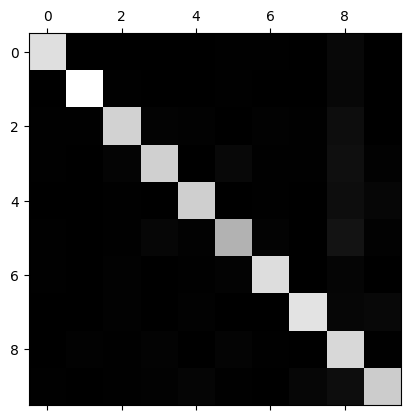

In [22]:
plt.figure(figsize=(5,5))
plt.matshow(confusion_matrix,cmap='gray')
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_scaled,Y_train)
y_predict = classifier.predict(X_test)

cross_val_score(classifier,X_train,Y_train,cv=3,scoring='accuracy')

array([0.9629, 0.9646, 0.964 ])